2021143

duaa khan

lab4

In [19]:
import time

In [30]:
graph = {
            'arad': [('sibiu', 140), ('timisoara', 118), ('zerind', 75)],
            'sibiu': [('arad', 140), ('oradea', 151), ('fagaras', 99), ('rimnicu', 80)],
            'timisoara': [('arad', 118), ('lugoj', 111)],
            'zerind': [('arad', 75), ('oradea', 71)],
            'oradea': [('zerind', 71), ('sibiu', 151)],
            'fagaras': [('sibiu', 99), ('bucharest', 211)],
            'rimnicu': [('sibiu', 80), ('craiova', 146), ('pitesti', 97)],
            'lugoj': [('timisoara', 111), ('mehadia', 70)],
            'bucharest': [('giurgiu', 90), ('urziceni', 85), ('pitesti', 101), ('fagaras', 211)],
            'craiova': [('dobreta', 120), ('pitesti', 138), ('rimnicu', 146)],
            'pitesti': [('rimnicu', 97), ('craiova', 138), ('bucharest', 101)],
            'mehadia': [('dobreta', 75), ('lugoj', 70)],
            'giurgiu': [('bucharest', 90)],
            'urziceni': [('bucharest', 85), ('hirsova', 98), ('vaslui', 142)],
            'dobreta': [('mehadia', 75), ('craiova', 120)],
            'hirsova' : [('eforie', 86), ('urziceni', 98)],
            'vaslui' : [('urziceni', 142), ('lasi', 92)],
            'eforie' : [('hirsova', 86)],
            'lasi': [('neamt', 87), ('vaslui', 92)],
            'neamt': [('lasi', 87)]
        }


In [97]:
a = time.time()

In [98]:
class Graph:
    def __init__(self, graph):
        self.graph = graph
        
    def get_neighbours(self, v):
        return self.graph[v]
    
    def h(self, n):
        H = {
                'arad': 366,
                'bucharest': 0,
                'craiova': 160,
                'dobreta': 242,
                'eforie': 161,
                'fagaras': 178,
                'giurgiu': 77,
                'hirsova': 151,
                'lasi': 226,
                'lugoj': 244,
                'mehadia': 241,
                'neamt': 234,
                'oradea': 380,
                'pitesti': 98,
                'rimnicu': 193,
                'sibiu': 253,
                'timisoara': 329,
                'urziceni': 80,
                'vaslui': 199,
                'zerind': 374
        }
        return H[n]
    
    def a_star_algo(self, start, goal):
        open_list = set([start])
        closed_list = set([])
        
        g = {}        #contains distances fro start node to current node, adds precious h distances 
        g[start] = 0
        
        parents = {}  #adjacency nodes
        parents[start] = start
        
        while len(open_list) > 0:
            n = None
            
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;
                    
            if n == None:
                print('path does not exist')
                return None
            
            if n == goal:
                reconst_path = []
                
                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]
                    
                reconst_path.append(start)
                reconst_path.reverse()
                
                print('path found: {}'.format(reconst_path))
                return reconst_path
            
            for(m, weight) in self.get_neighbours(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight 
                    #if the selected node isnt in either lists, we explore it and add it to open list as a parent
                    #the new weight of the mapp will be the previous weight of the explored graph + the h weight of this new node m
                    
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                        
                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)
                            
            open_list.remove(n)
            closed_list.add(n)
            
        print('path does not exist')
        return None
                    
    

In [99]:
a_star_time = time.time() - a
print(a_star_time)

3.709144115447998


In [44]:
g = Graph(graph)
g.a_star_algo('arad', 'neamt')


path found: ['arad', 'sibiu', 'rimnicu', 'pitesti', 'bucharest', 'urziceni', 'vaslui', 'lasi', 'neamt']


['arad',
 'sibiu',
 'rimnicu',
 'pitesti',
 'bucharest',
 'urziceni',
 'vaslui',
 'lasi',
 'neamt']

UCS

In [38]:
li = []
def myy(li):
    z= dict()
    for i in li:
        z[i[0]] = i[1]
    return z

In [39]:
def my(x):
    return x[1]

In [94]:
b = time.time()

In [95]:
def UCS(goal):

    q = []
    q.append(('arad',0))
    explored = []

    while len(q)> 0:

        #print(q)
        node = q.pop(0)


        print('POP: ',node)
        #print(q)

        explored.append(node[0])

        if node[0] == goal:
            print('+++++++++',explored)
            break


        child = graph.get(node[0])
        #print(child)

        for i in child:
            
            if i[0] not in explored and i[0] not in myy(q):
                cost = node[1] + i[1]
                new = (i[0],cost)
                #print(node[1],'+',i[1],'=',cost)
                #print('old: ',i,'new->',new)
                #print()
                q.append(i)
            else:
                q = sorted(q,key=my)
                print('***********',q)
UCS('neamt')

POP:  ('arad', 0)
POP:  ('sibiu', 140)
*********** [('zerind', 75), ('timisoara', 118)]
POP:  ('zerind', 75)
*********** [('rimnicu', 80), ('fagaras', 99), ('timisoara', 118), ('oradea', 151)]
*********** [('rimnicu', 80), ('fagaras', 99), ('timisoara', 118), ('oradea', 151)]
POP:  ('rimnicu', 80)
*********** [('fagaras', 99), ('timisoara', 118), ('oradea', 151)]
POP:  ('fagaras', 99)
*********** [('pitesti', 97), ('timisoara', 118), ('craiova', 146), ('oradea', 151)]
POP:  ('pitesti', 97)
*********** [('timisoara', 118), ('craiova', 146), ('oradea', 151), ('bucharest', 211)]
*********** [('timisoara', 118), ('craiova', 146), ('oradea', 151), ('bucharest', 211)]
*********** [('timisoara', 118), ('craiova', 146), ('oradea', 151), ('bucharest', 211)]
POP:  ('timisoara', 118)
*********** [('craiova', 146), ('oradea', 151), ('bucharest', 211)]
POP:  ('craiova', 146)
*********** [('lugoj', 111), ('dobreta', 120), ('oradea', 151), ('bucharest', 211)]
*********** [('lugoj', 111), ('dobreta', 

In [96]:
ucs_time = time.time() - b
print(ucs_time)

6.444409608840942


BFS

In [91]:
c = time.time()

In [92]:
def BFS(self, s):
 
        visited = [False] * (max(self.graph) + 1)
 
        queue = []

        queue.append(s)
        visited[s] = True
 
        while queue:

            s = queue.pop(0)
            print(s, end=" ")
 

            for i in self.graph[s]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True

In [93]:
bfs_time = time.time() - c
print(bfs_time)

5.181895017623901


DFS

In [88]:
d = time.time()


In [89]:
def DFS(self):
        # create a set to store all visited vertices
        visited = set()
    # call the recursive helper function to print DFS traversal starting from all
    # vertices one by one
        for vertex in graph:
            if vertex not in visited:
                self.DFSUtil(vertex, visited)

In [90]:
dfs_time = time.time() - d
print(dfs_time)

5.091774225234985


In [73]:
import matplotlib.pyplot as plt

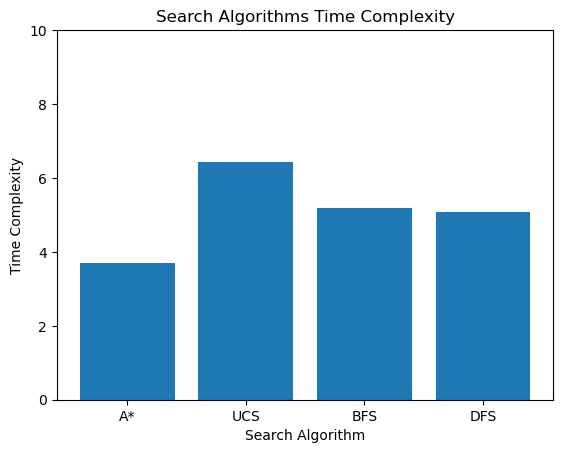

In [101]:
x = ['A*', 'UCS', 'BFS', 'DFS']

y = [a_star_time, ucs_time, bfs_time, dfs_time]

plt.bar(x, y)
plt.title('Search Algorithms Time Complexity')

plt.xlabel('Search Algorithm')
plt.ylabel('Time Complexity')
plt.ylim(0, 10)
plt.show()